In [2]:
import datetime
import time
import requests
import json
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Carga de Datos

In [5]:
# Definir la variable coin
coin = 'polkadot'

# Definir la ruta del archivo CSV según la variable coin
csv_path = f'../csv/{coin}.csv'

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_path)

# Mostrar las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

     Market Cap     Price        Volume        Date
0  0.000000e+00  2.936665  8.241398e+07  2020-08-19
1  0.000000e+00  2.936665  8.241398e+07  2020-08-20
2  0.000000e+00  2.898791  4.951174e+07  2020-08-21
3  0.000000e+00  2.871923  5.123375e+07  2020-08-22
4  4.028277e+09  4.481389  4.739210e+08  2020-08-23


# Información básica del DataFrame

In [6]:
# Información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Market Cap  1100 non-null   float64
 1   Price       1100 non-null   float64
 2   Volume      1100 non-null   float64
 3   Date        1100 non-null   object 
dtypes: float64(3), object(1)
memory usage: 34.5+ KB
None


No se observan valores nulos u otros datos inconsistentes y los valores atipicos aportan informacion valiosa al EDA. Se puede uilizar el Data Frame sin necesidad de otros tratamientos iniciales.

# Estadísticas resumidas

In [7]:
print(df.describe())

         Market Cap        Price        Volume
count  1.100000e+03  1100.000000  1.100000e+03
mean   1.604748e+10    15.283651  8.608470e+08
std    1.237852e+10    12.337586  9.617468e+08
min    0.000000e+00     2.871923  4.350072e+07
25%    6.611770e+09     5.490582  2.056782e+08
50%    8.897977e+09     8.013871  4.688958e+08
75%    2.390179e+10    22.932991  1.206087e+09
max    5.657831e+10    54.142860  7.440268e+09



El precio es volátil, su desviación estándar es apreciable respecto de la media, el precio ha cambiado en gran medida en cortos períodos de tiempo, el precio máximo fue muy alto.

La capitalización de mercado es volátil, su desviación estándar es apreciable respecto de la media.

Estas observaciones iniciales indican que podría considerarse como volátil en comparación con activos financieros tradicionales. 

# Histograma de Precios

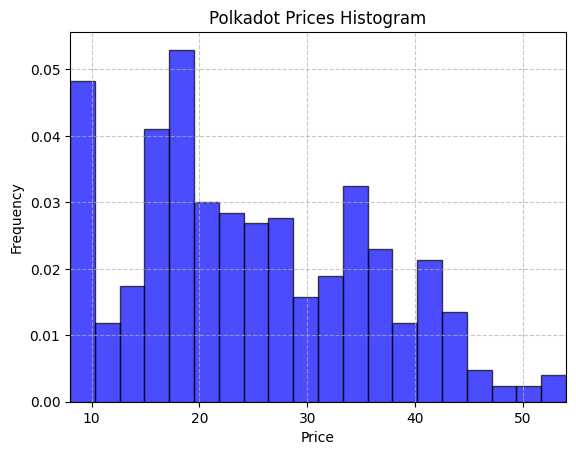

In [12]:
# Crear el histograma
plt.hist(df['Price'], bins=20, range=(8, 54), color='blue', edgecolor='black', density=True, alpha=0.7)

# Configurar límites del eje X
plt.xlim(8, 54)

# Configurar etiquetas y título
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title(f'{coin.capitalize()} Prices Histogram')

# Mostrar la trama
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Una observación preliminar de los precios, sugiere aproximarse a una distribución de datos normal, en la que la mayoría de los valores tienden a agruparse fuertemente alrededor de los valores de precios mas frecuentes.

# Gráficos de dispersión (scatter plot)

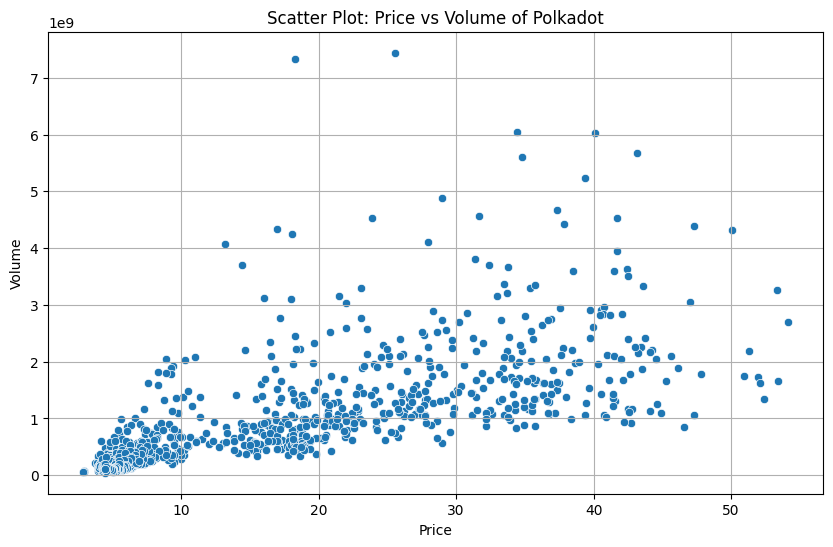

In [13]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Volume')
plt.title(f'Scatter Plot: Price vs Volume of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

No se observan muchos puntos que se desvíen significativamente de la tendencia general, estos puntos podrían representar eventos excepcionales que causaron un volumen inusual en relación con el precio.
El volumen tiende a aumentar cuando el precio sube, esto puede entenderse como una mayor actividad comercial cuando el precio es alcista.

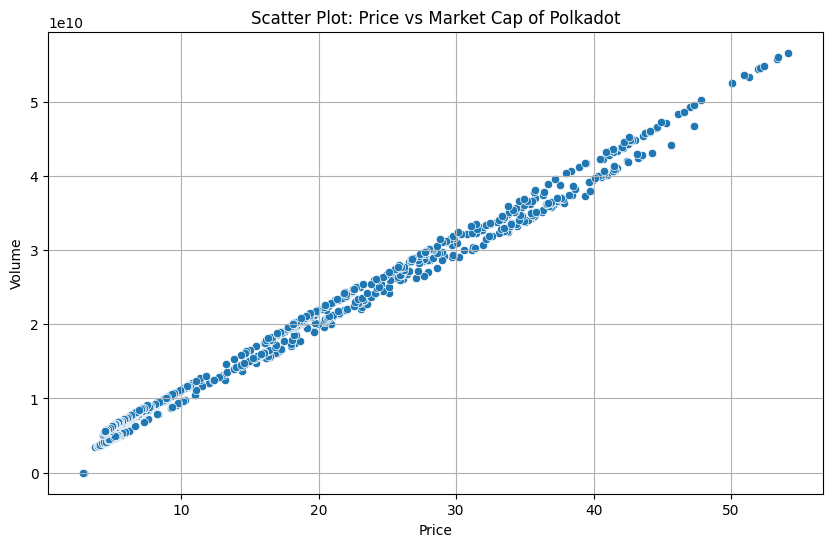

In [14]:
# Grafica de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Market Cap')
plt.title(f'Scatter Plot: Price vs Market Cap of {coin.capitalize()}')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [16]:
# Calcular y mostrar la matriz de correlación
correlation_matrix = df[['Price', 'Market Cap']].corr()
print("Matriz de correlación:")
print(correlation_matrix)

Matriz de correlación:
               Price  Market Cap
Price       1.000000    0.998426
Market Cap  0.998426    1.000000


La capitalización de mercado es el precio multiplicado por la cantidad que está en circulación. Por lo tanto, la capitalización de mercado también está determinada por la oferta y la demanda que determina el precio, de ahi esta alta correlación con el precio.

Líneas de tendencia en el gráfico con diferente pendiente pueden representar volatilidad.

# Gráficos de caja y bigotes (box plot)

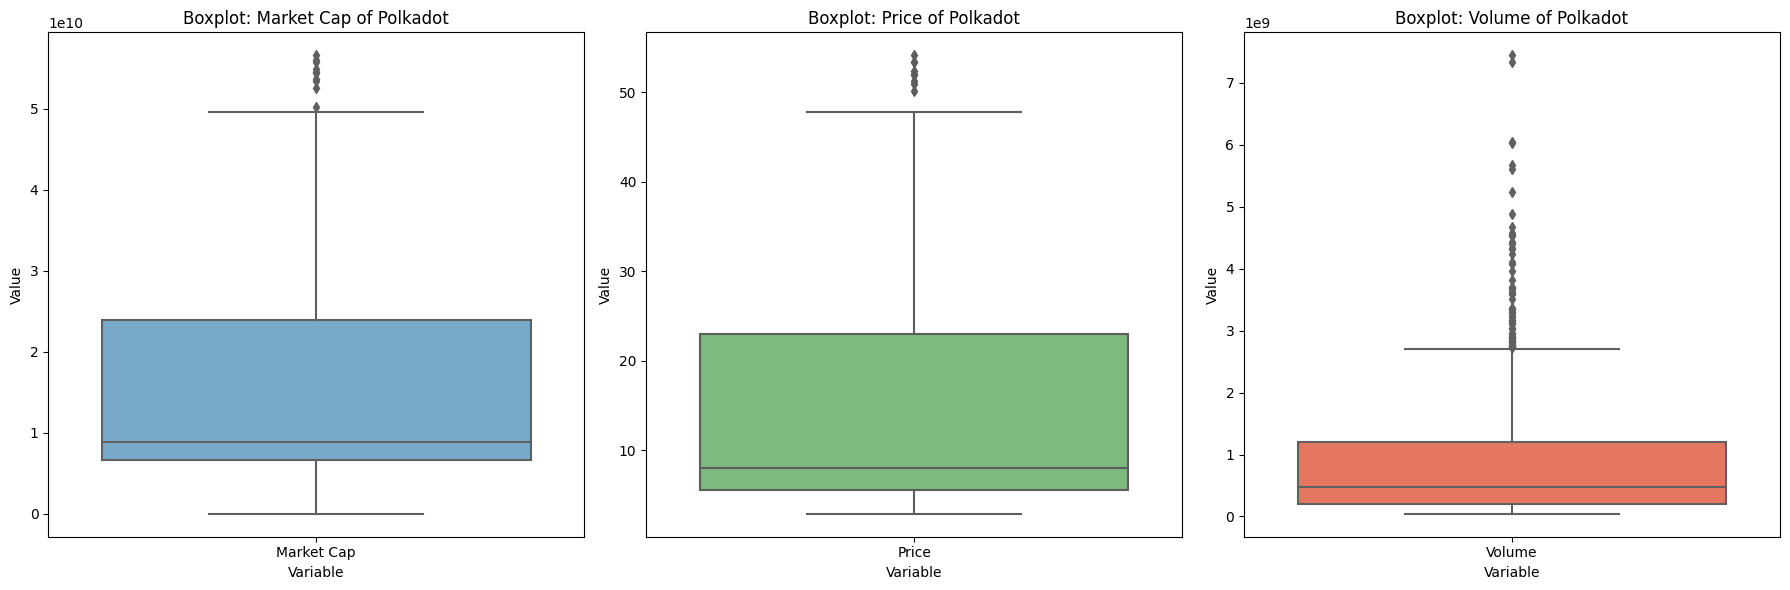

In [15]:
# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Paletas predefinidas
palette = ['Blues', 'Greens', 'Reds']

# Boxplot de Market Cap
sns.boxplot(data=df[['Market Cap']], ax=axes[0], palette=palette[0])
axes[0].set_title(f'Boxplot: Market Cap of {coin.capitalize()}')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Value')

# Boxplot de Price
sns.boxplot(data=df[['Price']], ax=axes[1], palette=palette[1])
axes[1].set_title(f'Boxplot: Price of {coin.capitalize()}')
axes[1].set_xlabel('Variable')
axes[1].set_ylabel('Value')

# Boxplot de Volume
sns.boxplot(data=df[['Volume']], ax=axes[2], palette=palette[2])
axes[2].set_title(f'Boxplot: Volume of {coin.capitalize()}')
axes[2].set_xlabel('Variable')
axes[2].set_ylabel('Value')

# Ajustar la disposición de los subplots y mostrar la figura
plt.tight_layout()
plt.show()

Se observa parte de los datos concentrados, los limites de las cajas (que representa la mitad central de los datos) se encuetran en valores cercanos de la escala.
El valor máximo es mucho más alto que la mediana, lo que sugiere que hay algunas transacciones muy grandes, estas transacciones contribuirían al alza del activo. 
El IQR es grande, lo que implica dispersion en los datos .

La altura comparativa de la mediana de volumen indicaría que es menos volátil, precio y capitalización de mercado siguen en orden.  
En general, el boxplot sugiere que Bitcoin es un activo muy volátil con una distribución muy concentrada.

Estas observaciones presentan discrepancias respecto de los valores estadísticos.
Un análisis más profundo y detallado de los valores atípicos en esta distribución puede permitir encontrar los fundamentos de las discrepancias observadas. 

Hay toda una serie de acciones para entender mejor esta discrepancia pero exceden el propósito de este trabajo.

Hay que consultar otras fuentes, ampliar el tamaño de la muestra e investigar más detalladamente contexto,  si ha ocurrido algún evento inusual o importante en este período de tiempo que podría haber afectado la distribución

In [17]:
# Convertir las columnas a numpy arrays numéricos
price_values = df['Price'].values
volume_values = df['Volume'].values
market_cap_values = df['Market Cap'].values

# Cálculos del Box-Whisker Ratio (BWR)
bwr_values = []

for values, column in zip([price_values, volume_values, market_cap_values], df.columns[1:]):
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    iwr = upper_whisker - lower_whisker
    if iwr != 0:  # Evitar división por cero
        bwr = iqr / iwr
        bwr_values.append(bwr)

# Imprimir los resultados del Box-Whisker Ratio (BWR)
for i, column in enumerate(df.columns[1:]):
    print(f"Box-Whisker Ratio (BWR) for {column}: {bwr_values[i]:.2f}")

# Cálculos de la Relative Median Height
median_height_values = []

for values in [price_values, volume_values, market_cap_values]:
    values = values[~np.isnan(values)]  # Eliminar valores no válidos
    median_height = np.median(values) / values.max()
    median_height_values.append(median_height)

# Imprimir los resultados de la Relative Median Height
for i, column in enumerate(df.columns[1:]):
    print(f"Relative Median Height (RMH))for {column}: {median_height_values[i]:.2f}")


Box-Whisker Ratio (BWR) for Price: 0.25
Box-Whisker Ratio (BWR) for Volume: 0.25
Box-Whisker Ratio (BWR) for Date: 0.25
Relative Median Height (RMH))for Price: 0.15
Relative Median Height (RMH))for Volume: 0.06
Relative Median Height (RMH))for Date: 0.16



Los valores obtenidos para BWR y RMH son consistentes con las observaciones realizadas a partir de los boxplots.  

# Gráficos de Evolución Temporal (line plot)

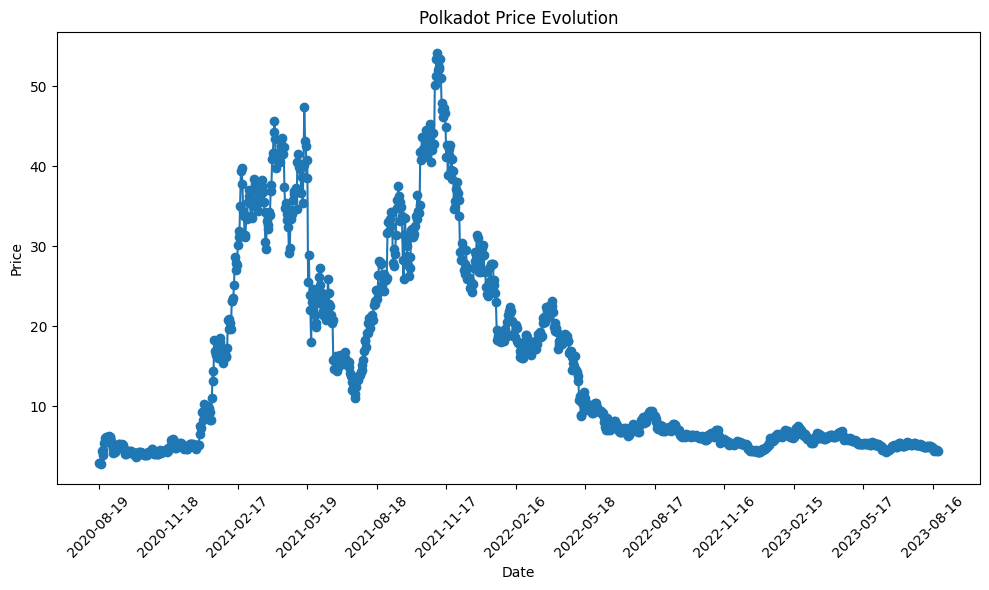

In [18]:
# Graficar la evolución del precio vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{coin.capitalize()} Price Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

plt.tight_layout()
plt.show()

La evolución del precio de Polkadot (DOT) desde su inicio ha sido positiva, pero ha experimentado una gran volatilidad. El precio de DOT se disparó desde su lanzamiento en octubre de 2020 hasta alcanzar un máximo histórico de 54,98 USD en noviembre de 2021. Sin embargo, el precio ha disminuido desde entonces, y actualmente se cotiza a alrededor de 4,46 USD.

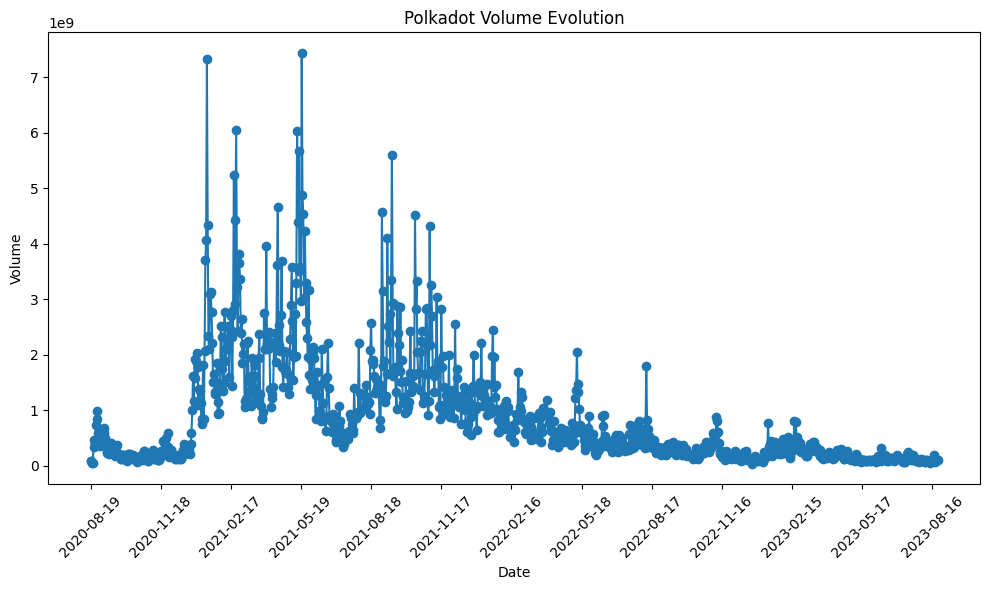

In [19]:
# Graficar la evolución del volumen vs fecha
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], marker='o')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'{coin.capitalize()} Volume Evolution')

# Obtener índices para mostrar 12 fechas equidistantes
step = len(df) // 12
x_labels = df['Date'][::step]
plt.xticks(x_labels, rotation=45)

plt.tight_layout()
plt.show()

La evolución del volumen de Polkadot (DOT) desde su inicio ha sido positiva, pero ha experimentado una gran volatilidad. El volumen de DOT se disparó desde su lanzamiento en octubre de 2020 hasta alcanzar un máximo histórico de 2.700 millones de dólares en noviembre de 2021. Sin embargo, el volumen ha disminuido desde entonces, y actualmente se sitúa en torno a los 97 millones de dólares.

In [ ]:
# Ejemplo de una serie de valores
data = df['Price']

# Calcula la media y la desviación estándar
mean = np.mean(data)
std = np.std(data)

# Calcula el coeficiente de curtosis
kurtosis = np.sum((np.array(data) - mean) ** 4) / (len(data) * std ** 4)

print("Coeficiente de Curtosis:", kurtosis)


Este coeficiente indica que hay una menor probabilidad de observar valores atípicos o extremos en la distribución de los precios en comparación con otras criptomonedas.

# Conclusiones Preliminares para Polkadot

Los distintos gráficos, cálculos y métricas evaluadas no resultan consistentes, dificultando del entendimiento el comportamiento histórico de esta criptomoneda.     

El desarrollo muy dinámico de nuevas aplicaciones entre las plataformas de interoperabilidad, podría conducir a un aumento de la demanda Polkadot y a un aumento de su precio.

Polkadot ha mostrado una distribución platicúrtica(Coeficiente de Curtosis < 3) tiene colas más ligeras y un pico central más aplanado pero muy cercano con una distribución normal.

Una distribución platicúrtica puede representar estabilidad relativa con menor probabilidad de eventos extremos,menor Riesgo de pérdidas extremas, adopción más amplia, más confiable para su uso en contratos inteligentes y acuerdos financieros, menor especulación y mayor atracción para Inversores Conservadores.

Esta criptomoneda podría formar parte de una estrategia de inversión más conservadora.

Los inversores más reacios al riesgo pueden preferir activos y mercados con distribuciones platicúrticas porque es menos probable que esos activos produzcan resultados extremos. 

# Polkadot es un activo financiero con potencial de ganancias y pérdidas significativas. 

En caso de superar esta etapa de evaluacion preliminar, se recomienda un detallado análisis técnico, fundamental y de sentimiento para Polkadot.